<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - In-class Exam



---
#### Guidelines 
- This is your notebook for your in-class midterm exam. 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, if you do, your answers will be considered invalid = **0%**).
- The in-class exam is **10%** of your total midterm score.
- During the exam you can only have the following websites open in your browser:
    * [ECON-628-01 github][1]
    * ECON-628-01-yourgithubusersname 
    * [StackOverflow][2]  
- If we noticed that your computer browser has other websites open, you will be asked to **close your computer, leave the class, and will get an score of 0%**
- Remember: if you are using code from someone else/online (StackOverflow) you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
    


- Once you are done with your exam use this [link][3] to **submit** the GitHub link to your take home exam.
[1]:https://github.com/jrcmalunay/ECON628-01 "ECON-628-01 github"
[2]:http://stackoverflow.com "StackOverflow"
[3]: https://docs.google.com/forms/d/e/1FAIpQLSercXrXIky91taz98tPviIqA8C0FaQZ_WIfNoRYxMbV5wPtkg/viewform "link"

---



### Dataset 
This dataset comes from the Sleep and the allocation of time [paper][1] by Biddle, Jeff and Hamermesh, Daniel where using aggregated data for 12 countries, a cross section of microeconomic data, and a panel of households, they demonstrate that increases in time in the labor market reduce sleep!!!! The variables are:
https://www.jstor.org/stable/2937618?seq=1#page_scan_tab_contents

| **Name**   |      **Description**     |  
|----------|:-------------:|
| age | in years | 
| black | =1 if black | 
| case | identifier | 
| clerical | =1 if clerical worker |
| construc | =1 if construction worker |
| educ | years of schooling|
| earns74 | total earnings, 1974 |
| gdhlth | =1 if in good or excellent health |
| inlf |  =1 if in labor force |
|leis1  |sleep - totwrk|
|leis2  |slpnaps - totwrk|
|leis3  |rlxall - totwrk|
| smsa |  =1 if living in SMSA |
| | SMSA is the Standard Metropolitan Statistical Area, an integrated economic and social unit having a large population nucleus. It is a good indicator of living in a city.|
|lhrwage| log hourly wage|
|lothinc | log othinc, unless othinc < 0
| male |  =1 if male |
| marr | =1 if married |
| prot | =1 if Protestant |
|rlxall |slpnaps + personal activs|
| selfe  | =1 if self employed|
| sleep | minutes sleep at night, per week |
| slpnaps | minutes sleep, including naps, per week |
| south |  =1 if live in south |
| spsepay |  spousal wage income |
| spwrk75 |  =1 if spouse works |
| totwrk | minutes worked per week |
| union |  =1 if belong to union |
| worknrm | minutes work main job |
| workscnd | minutes work second job |
|exper     | age - educ - 6 |
| yngkid | =1 if children less than 3 years present |
| yrsmarr | years married |
| hrwage | hourly wage |
|agesq   |age^2|


[1]:https://core.ac.uk/download/pdf/6820141.pdf "paper"


---


---

## The Scenario
---
The PI (principal investigator) of a project you are working for, claims that nowadays people sleep "more" because access to the internet and the mechanization of labor reduces their work time. Based on this assumption, he wants to implement a literacy program that requires participants to read 1 chapter of a book one hour before their bed time and one section of an introduction to mathematics book one hour before they leave their home for work.

**He asks you to find out if people are indeed sleeping more or not, before he implements the literacy program.** 
Assume that, you don't have any other dataset but the one from the Biddle and Hamermesh paper to answer this question. 
Use all the predictive methods, you consider neccesary to give  an answer to the PI, and make sure you explain the output of your predictive analysis.


---

### Basic package imports
---

In [243]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Read/load the dataset "sleep_bh.csv" and do an initial overview of the data
    Check the shape of your data
    Cheeck the type of values
    Identify which variables have missing values
    Print a list of the indices where there are missing values
---

In [244]:
sleep = 'C:/Users/mjors_000/Desktop/ECON628-01/datasets/sleep/sleep_bh.csv'
sleep= pd.read_csv(sleep)

In [245]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
age         706 non-null int64
black       706 non-null int64
case        706 non-null int64
clerical    706 non-null float64
construc    706 non-null float64
educ        706 non-null int64
earns74     706 non-null int64
gdhlth      706 non-null int64
inlf        706 non-null int64
leis1       706 non-null int64
leis2       706 non-null int64
leis3       706 non-null int64
smsa        706 non-null int64
lhrwage     532 non-null float64
lothinc     706 non-null float64
male        706 non-null int64
marr        706 non-null int64
prot        706 non-null int64
rlxall      706 non-null int64
selfe       706 non-null int64
sleep       706 non-null int64
slpnaps     706 non-null int64
south       706 non-null int64
spsepay     706 non-null int64
spwrk75     706 non-null int64
totwrk      706 non-null int64
union       706 non-null int64
worknrm     706 non-null int64
workscnd    706 non

In [246]:
sleep.isnull().sum()

age           0
black         0
case          0
clerical      0
construc      0
educ          0
earns74       0
gdhlth        0
inlf          0
leis1         0
leis2         0
leis3         0
smsa          0
lhrwage     174
lothinc       0
male          0
marr          0
prot          0
rlxall        0
selfe         0
sleep         0
slpnaps       0
south         0
spsepay       0
spwrk75       0
totwrk        0
union         0
worknrm       0
workscnd      0
exper         0
yngkid        0
yrsmarr       0
hrwage      174
agesq         0
dtype: int64

We have 174 missing observations for log hour wage/hour wage 

In [247]:
sleep.head(2)

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961


In [248]:
sleep.tail(3)

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916
705,30,0,706,0.182331,0.030075,16,6750,1,0,4747,...,0,2363,0,2363,0,8,1,9,NaN,900


In [249]:
#Now I want to describe the data (Summary statistics)
sleep.describe().T

,count,mean,std,min,25%,50%,75%,max
age,706.0,38.815864,11.342637,23.000000,29.000000,36.000000,48.000000,65.000000
black,706.0,0.049575,0.217219,0.000000,0.000000,0.000000,0.000000,1.000000
case,706.0,353.500000,203.948932,1.000000,177.250000,353.500000,529.750000,706.000000
clerical,706.0,0.182331,0.335413,0.000000,0.000000,0.000000,0.182331,1.000000
construc,706.0,0.030075,0.148366,0.000000,0.000000,0.000000,0.030075,1.000000
educ,706.0,12.780453,2.784702,1.000000,12.000000,12.000000,16.000000,17.000000
earns74,706.0,9767.705382,9323.588151,0.000000,2500.000000,8250.000000,13750.000000,42500.000000
gdhlth,706.0,0.890935,0.311942,0.000000,1.000000,1.000000,1.000000,1.000000
inlf,706.0,0.753541,0.431254,0.000000,1.000000,1.000000,1.000000,1.000000
leis1,706.0,4690.723796,908.049561,1745.000000,4109.750000,4620.000000,5203.750000,7417.000000


## 2. Drop missing values (not the best practice), but OK for exam 
    Once you drop the missing values, check that the list of binary variables have values of 1 an 0
        Note: at this point the inlf predictor/variable should have the value of 1
---

In [250]:
#Now after little exploration, I am dropping the missing values
sleep.dropna(axis=0, inplace=True)

#Checking if we still have missing values
sleep.isnull().sum()

age         0
black       0
case        0
clerical    0
construc    0
educ        0
earns74     0
gdhlth      0
inlf        0
leis1       0
leis2       0
leis3       0
smsa        0
lhrwage     0
lothinc     0
male        0
marr        0
prot        0
rlxall      0
selfe       0
sleep       0
slpnaps     0
south       0
spsepay     0
spwrk75     0
totwrk      0
union       0
worknrm     0
workscnd    0
exper       0
yngkid      0
yrsmarr     0
hrwage      0
agesq       0
dtype: int64

In [251]:
#Just to check how many observations we have left
sleep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 531
Data columns (total 34 columns):
age         532 non-null int64
black       532 non-null int64
case        532 non-null int64
clerical    532 non-null float64
construc    532 non-null float64
educ        532 non-null int64
earns74     532 non-null int64
gdhlth      532 non-null int64
inlf        532 non-null int64
leis1       532 non-null int64
leis2       532 non-null int64
leis3       532 non-null int64
smsa        532 non-null int64
lhrwage     532 non-null float64
lothinc     532 non-null float64
male        532 non-null int64
marr        532 non-null int64
prot        532 non-null int64
rlxall      532 non-null int64
selfe       532 non-null int64
sleep       532 non-null int64
slpnaps     532 non-null int64
south       532 non-null int64
spsepay     532 non-null int64
spwrk75     532 non-null int64
totwrk      532 non-null int64
union       532 non-null int64
worknrm     532 non-null int64
workscnd    532 non

We have 532 observations left after dropping 174 observations.

## 3. Check for correlations
    Implement a correlation heatmap
---

We first created a heatmap, but because we had too many features, the heatmap was messy, so we are going to create subsets of data to visualize correlations

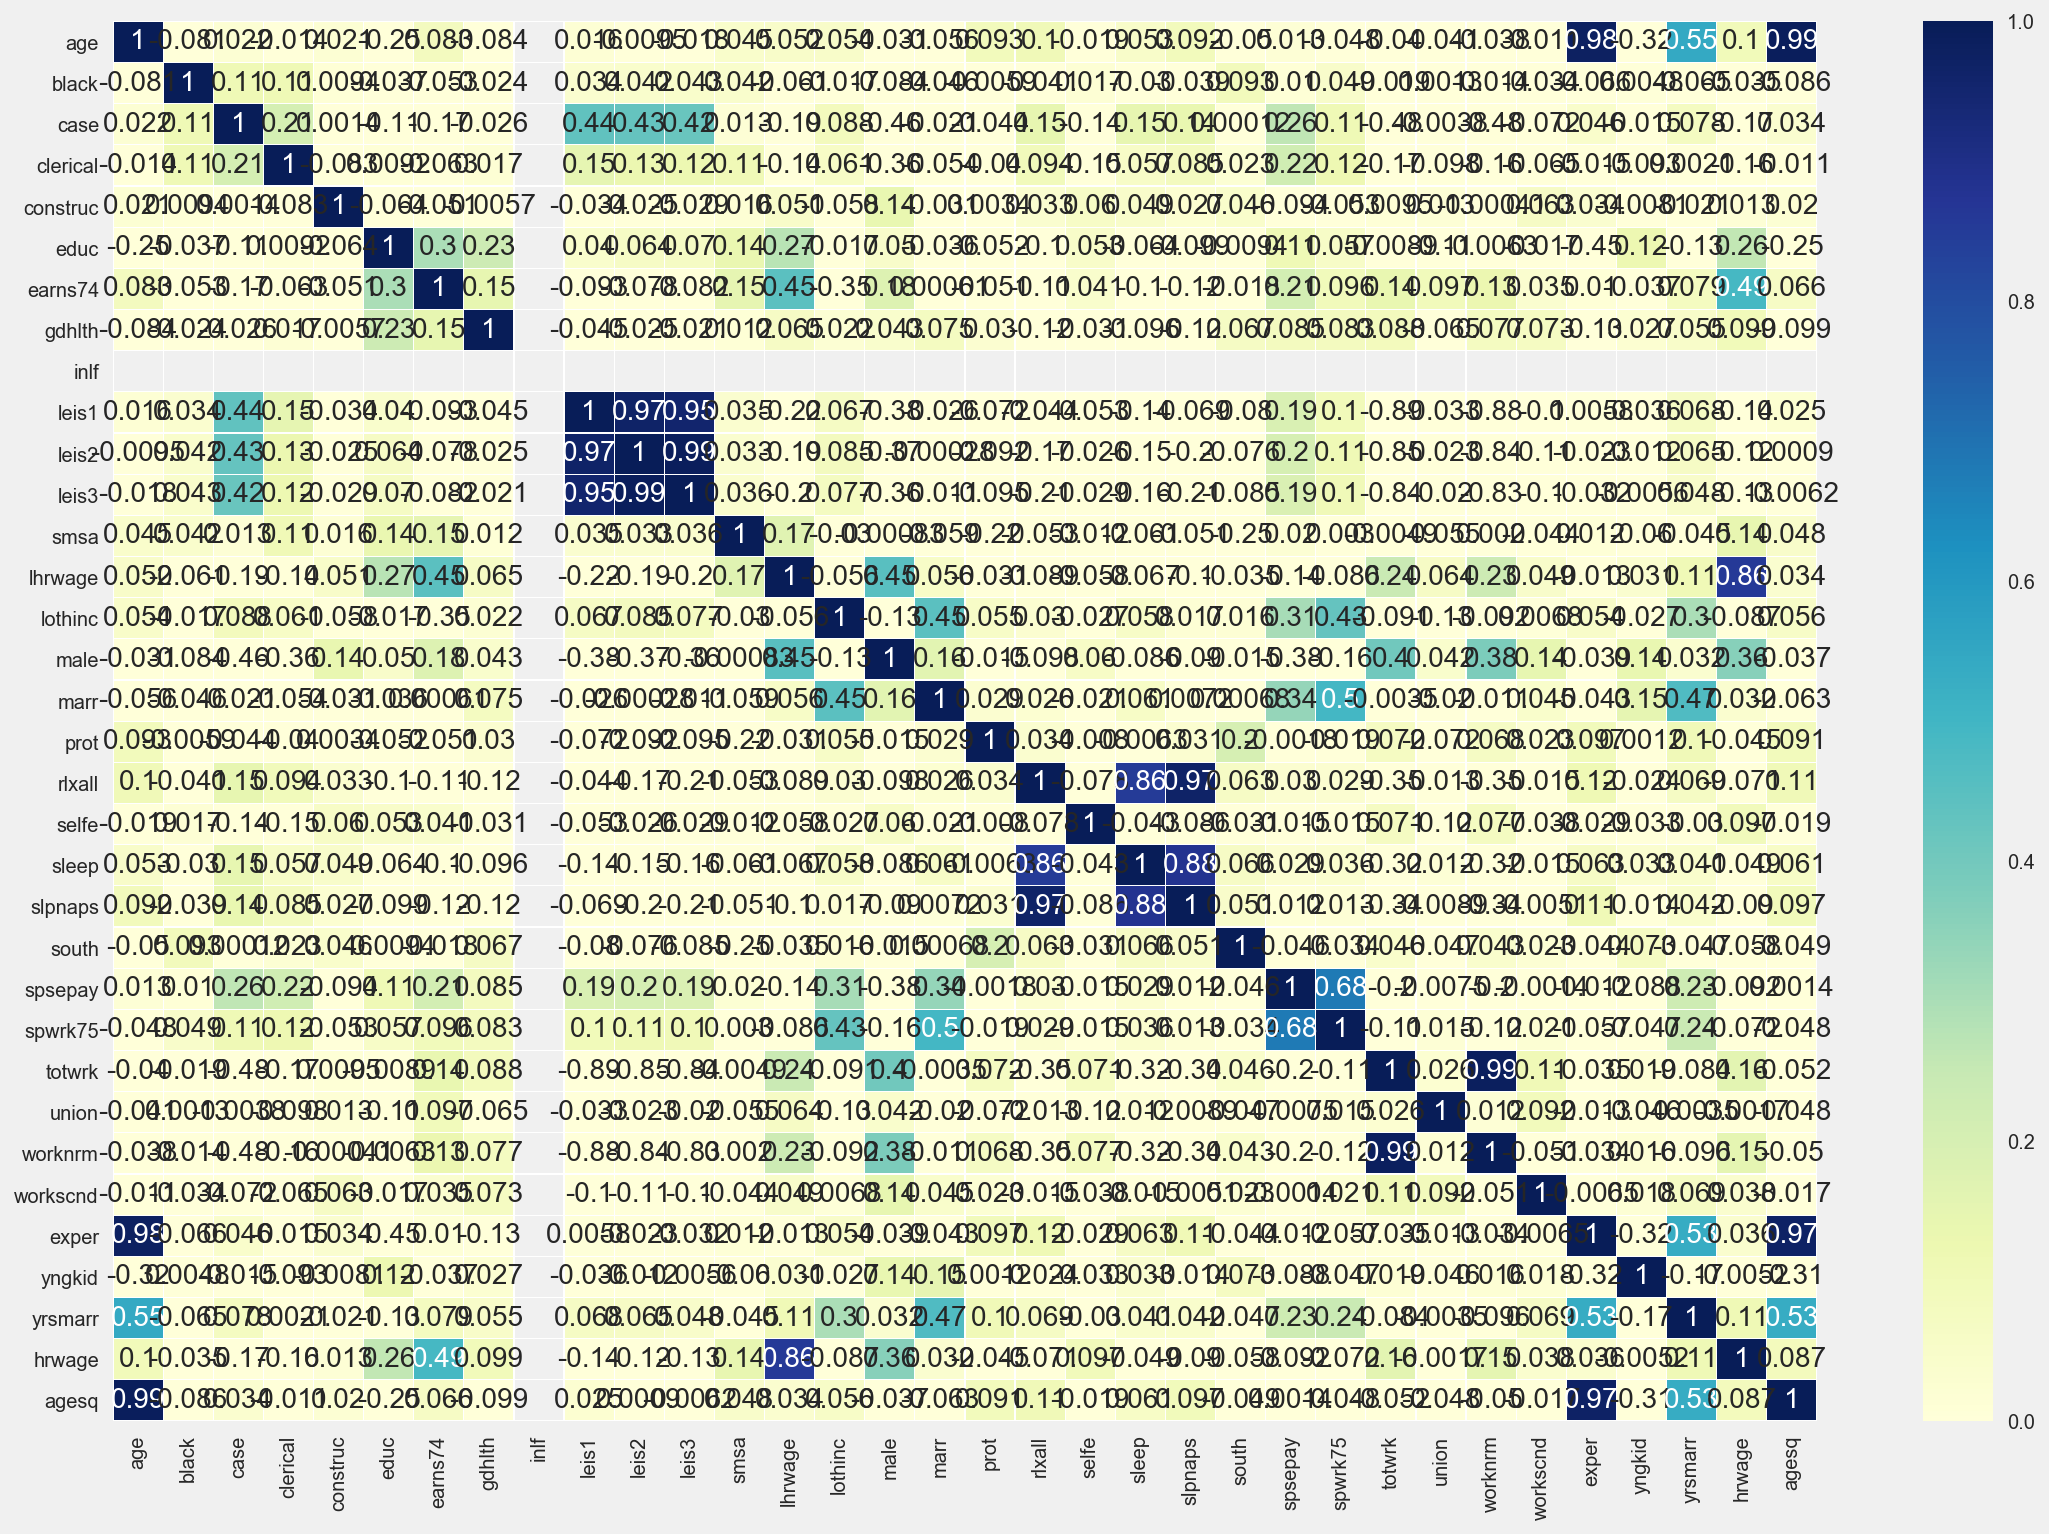

In [233]:
#Heatmap with full dataset
fig = plt.figure(figsize=(17,12))
ax = fig.gca()
sns.heatmap(sleep.corr(), annot=True, linewidths=.10, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

In [134]:
#I'm defining a new subset dataframe
df0 = pd.DataFrame(sleep, columns=['age', 'black', 'clerical', 'educ', 'earns74', 'gdhlth', 'leis1', 'leis2', 'leis3','spsepay','sleep'] )

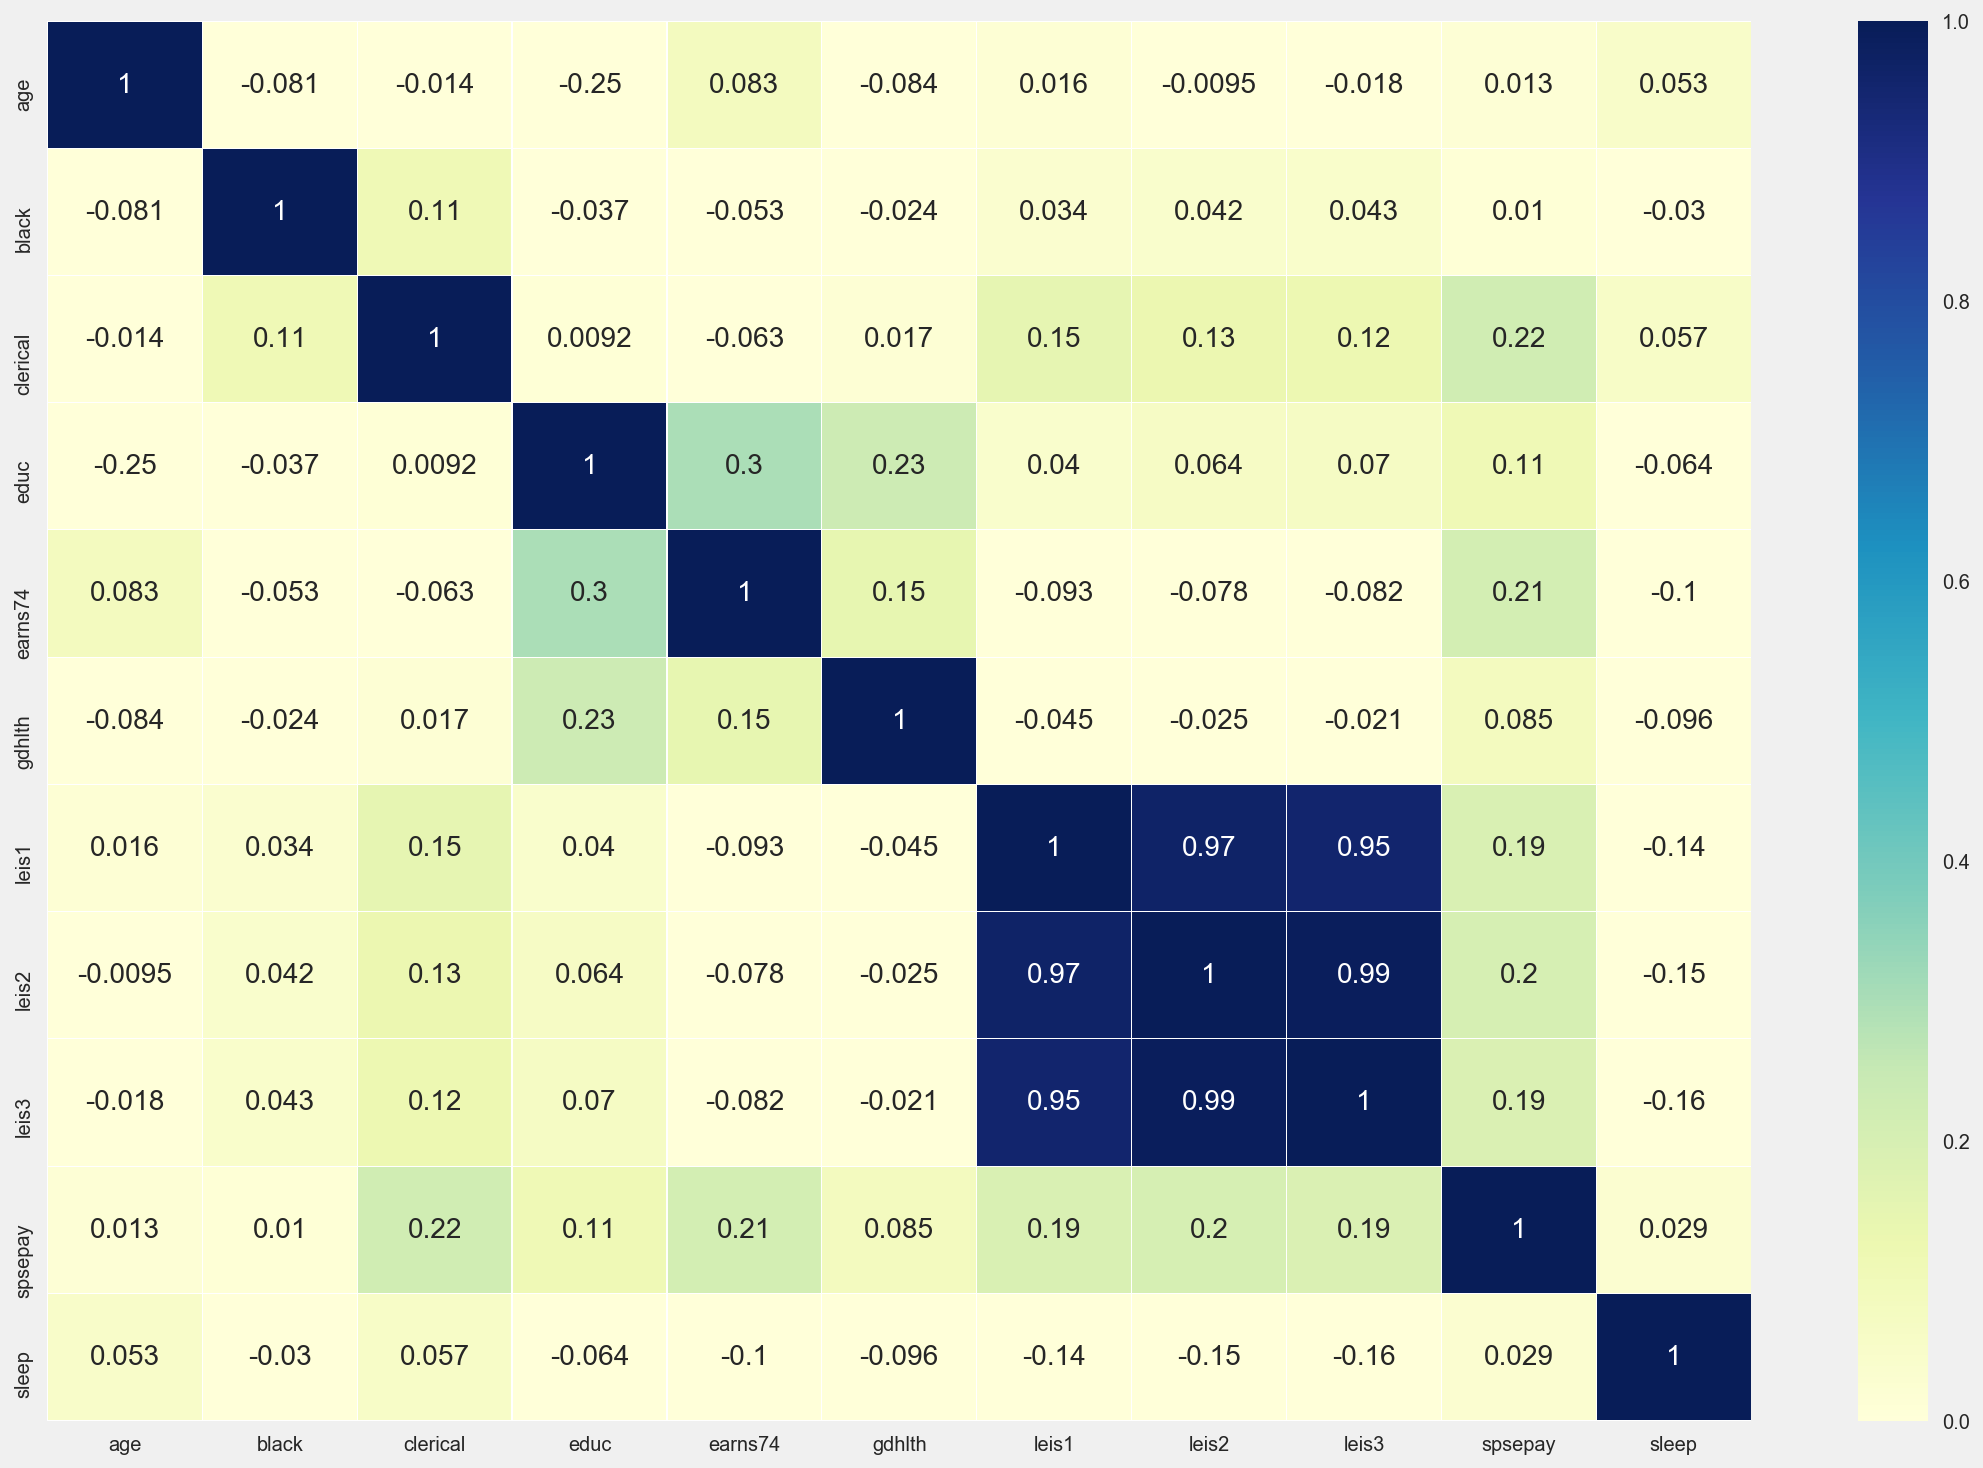

In [135]:
#Heatmap for df0
fig = plt.figure(figsize=(17,12))
ax = fig.gca()
sns.heatmap(df0.corr(), annot=True, linewidths=.10, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

In [136]:
#defining df1
df1 = pd.DataFrame(sleep, columns=['smsa', 'lhrwage', 'male', 'marr', 'prot', 'selfe', 'sleep', 'spsepay', 'south'])

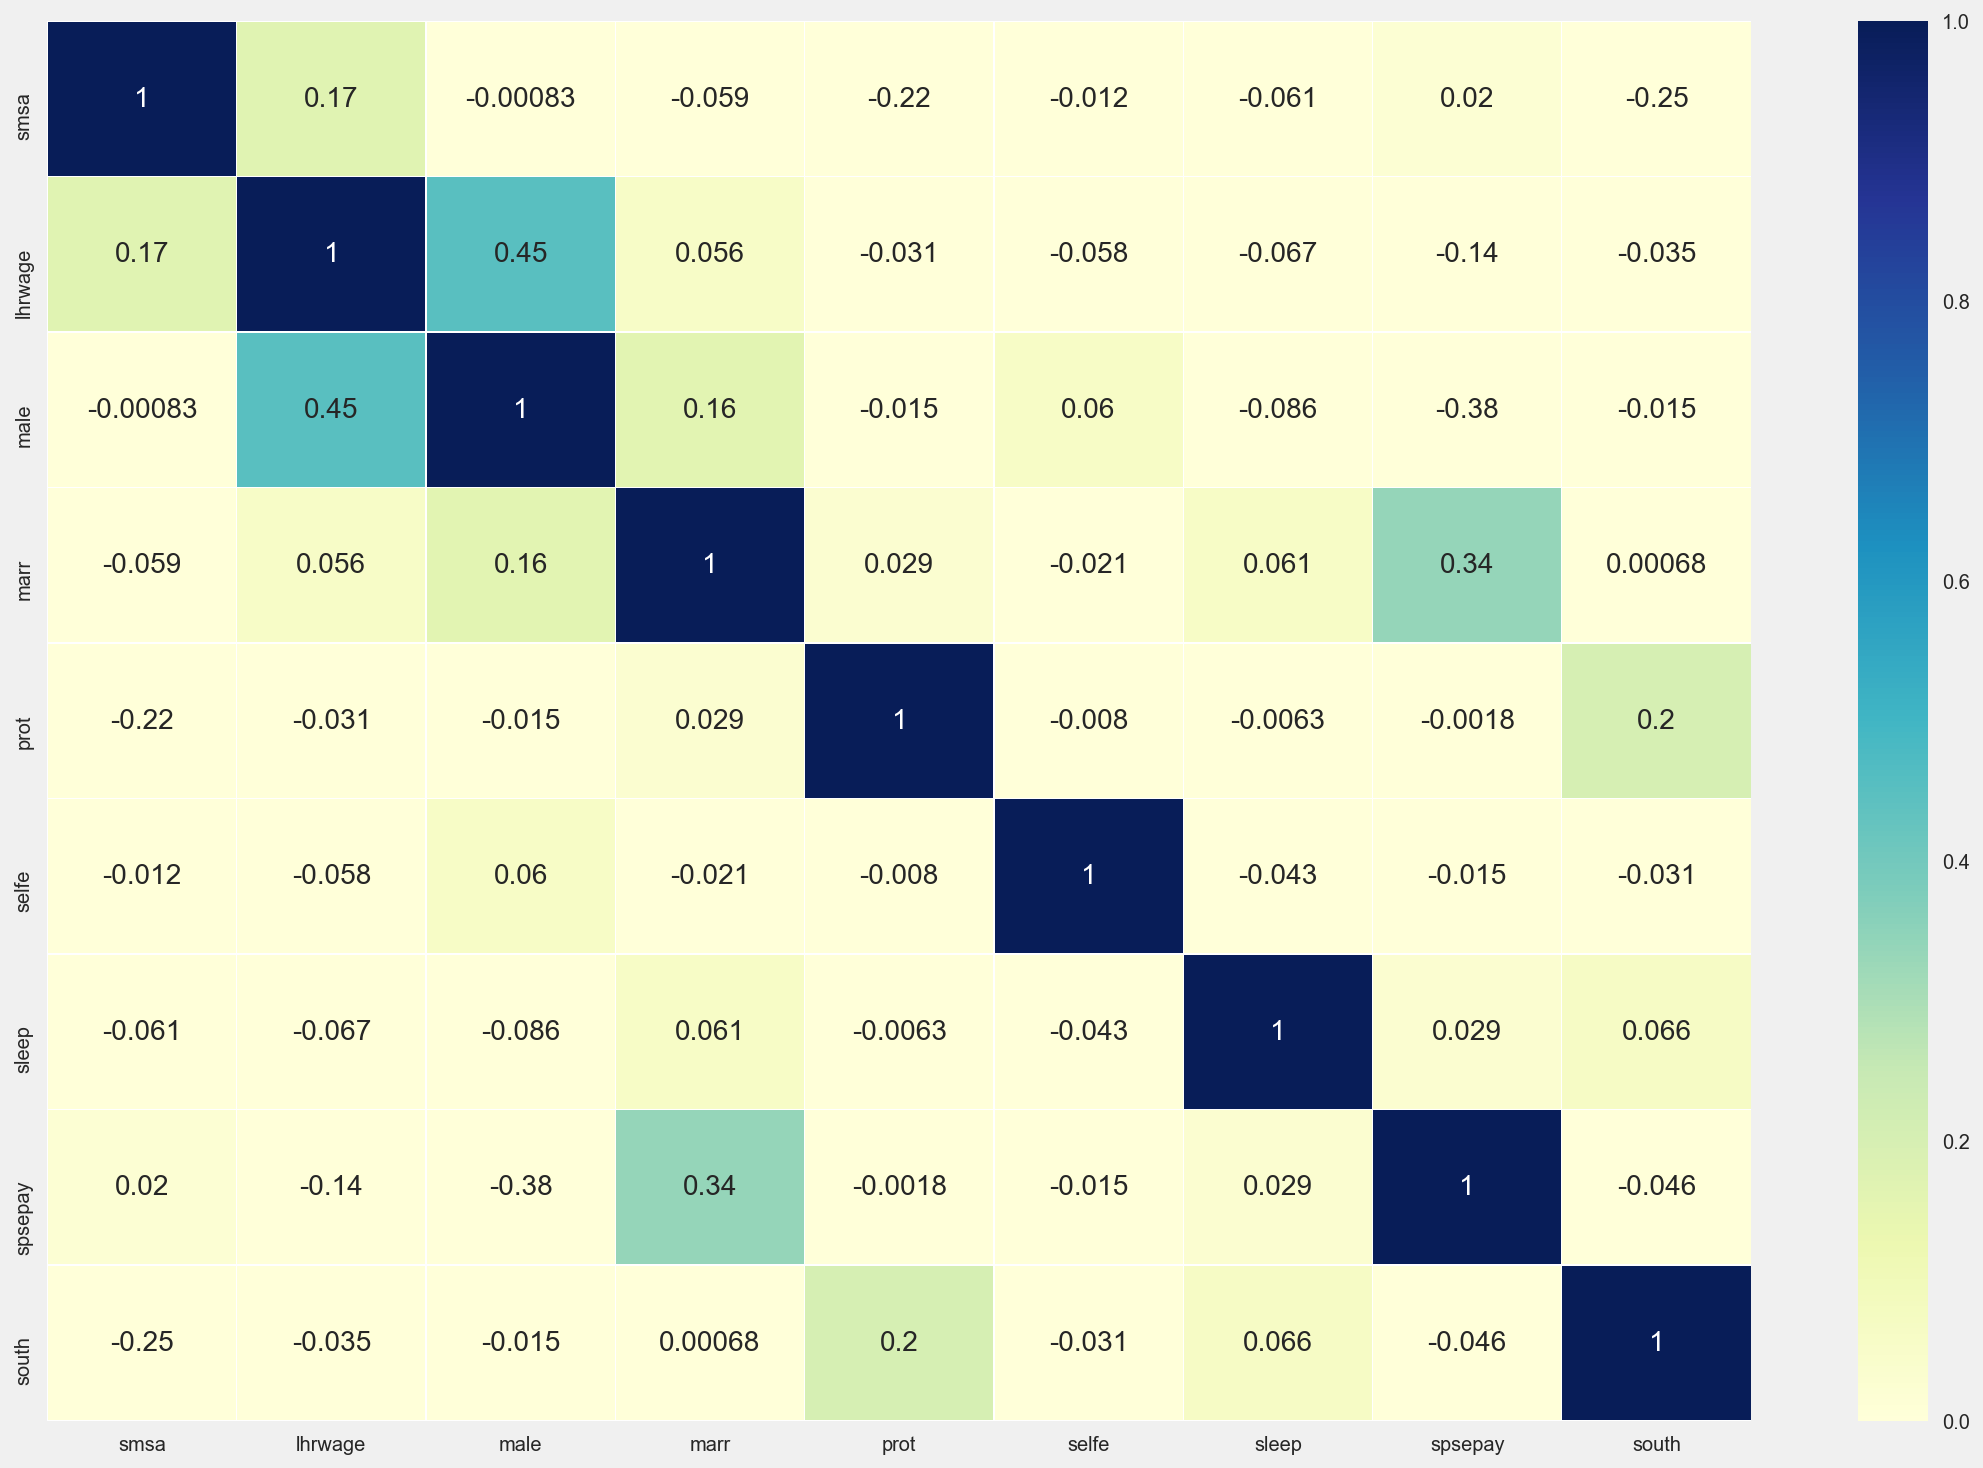

In [137]:
#heatmap for df1
fig = plt.figure(figsize=(17,12))
ax = fig.gca()
sns.heatmap(df1.corr(), annot=True, linewidths=.10, cmap="YlGnBu", vmin=0, vmax=1, ax=ax)
plt.show()

We can see from the correlation map that number of minutes slept is highly correlated with 

## 4.1 Predictions
    Define y (mins sleep at night, per week)
    Define X (where X are your predictors => make sure to include the correct variables, i.e. exclude y, case, lothinc, and **other** variables)
    Standarized your Xs
    Train test split:
        splits your data into train test, 
        assigns a size of 30% to your test set, and use random_state=10
        print the shape of your train (X, y) and test (X, y)
---

Defining Y and X

In [252]:
## Define y
y = sleep['sleep']
## Define X (excluding dependent variable)
columns_ = sleep.columns.tolist()
exclude_cols = ['sleep','slpnaps','lothinc', 'case', 'leis1', 'leis2', 'leis3', 'hrwage', 'rlxall', 'worknrm', 'workscnd', 'agesq' ] 
#This is TO EXCLUDE SOME VAR FROM THE WHOLE DATA FRAME

X = sleep[[i for i in columns_ if i not in exclude_cols]] 
#IF THE VAR ARE NOT IN EXCLUDED LIST

## We want to see the shape of our Y and X
print y.shape, X.shape


(532L,) (532, 22)


In [253]:
X.head(2)

,age,black,clerical,construc,educ,earns74,gdhlth,inlf,smsa,lhrwage,...,prot,selfe,south,spsepay,spwrk75,totwrk,union,exper,yngkid,yrsmarr
0,32,0,0.0,0.0,12,0,0,1,0,1.955861,...,1,0,0,0,0,3438,0,14,0,13
1,31,0,0.0,0.0,14,9500,1,1,0,0.357674,...,1,1,1,0,0,5020,0,11,0,0


The reason why we excluded those variables from the list is because they were either non important such as case (identifier), or they were already present in another form such as keeping log hourly wage and removing hour wage.

Now we standardize our Xs

In [254]:
#Import the correct package
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() 

# use the "fit_transform" function to normalize the X dmatrix
Xn = ss.fit_transform(X)

Creating Train and Split Samples

In [255]:
#Import package
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(Xn, y, test_size=0.3, random_state=10)
print Xtrain.shape, Xtest.shape
print "\n======\n"
print ytrain.shape, ytest.shape

(372L, 22L) (160L, 22L)


(372L,) (160L,)


## 4.2 Machine Learning models 
    OLS, Regularization methods and evaluate the performance of your models on the train and test datasets
    Cross validate at least 10 times the R^2 scores of your models and print the average R^2 scores 
    For the OLS implement an scatter plot that shows the relation between your predicted values and the y_test values (the actual values)
    
---

## 4.2.1 OLS
    
---

First Step

In [256]:
## we import packages 
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression


Second Step

In [259]:
## define a linear regression model

lr = linear_model.LinearRegression()


## fit our model
model = lr.fit(Xtrain, ytrain)


In [260]:
from sklearn.cross_validation import cross_val_score

## predict values:We predict on the train and the test so we can see how the model performs
ytrain_pred = lr.predict(Xtrain)
ytest_pred = lr.predict(Xtest)


## We Cross validate = 10
linreg_scores = cross_val_score(lr, Xtrain, ytrain, cv=10)

## Print the R^2
print linreg_scores
print "Average R^2 OLS score: %.3f" % (np.mean(linreg_scores))

print ("R^2:", model.score(Xtrain, ytrain))
print ("Coefficients:", model.coef_)
print ("Intercept:", model.intercept_)

[ 0.03584101 -0.1169797  -0.06094549  0.30007881 -0.23527688  0.09903402
 -0.23922556  0.10100393 -0.04417968  0.04718095]
Average R^2 OLS score: -0.011
('R^2:', 0.15862822239222618)
('Coefficients:', array([  4.56341611e+16,  -8.00000000e+00,   1.20000000e+01,
         8.00000000e+00,  -1.09426682e+16,  -1.10000000e+01,
        -3.15000000e+01,  -2.83698092e+15,  -2.35000000e+01,
         2.31875000e+01,  -1.77500000e+01,   4.76250000e+01,
         5.00000000e+00,  -9.53125000e+00,   3.33750000e+01,
        -1.61250000e+01,   6.75000000e+00,  -1.68500000e+02,
         1.31250000e+01,  -4.95153876e+16,   2.04375000e+01,
        -2.90390625e+01]))
('Intercept:', 3268.239247311828)


Now since we have already trained and tested our model , we need to evaluate using MSE and R^2

In [261]:
## Use the R^2 and MSE to see how the model is performing on train and test data
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE - OLS train: %.3f, test: %.3f' % (
        mean_squared_error(ytrain, ytrain_pred), #ytest_pred and ytrain_pred were created above
        mean_squared_error(ytest, ytest_pred)))
print('R^2 0LS train: %.3f, test: %.3f' % (
        r2_score(ytrain, ytrain_pred),
        r2_score(ytest, ytest_pred)))

MSE - OLS train: 158244.686, test: 175474.232
R^2 0LS train: 0.159, test: 0.018


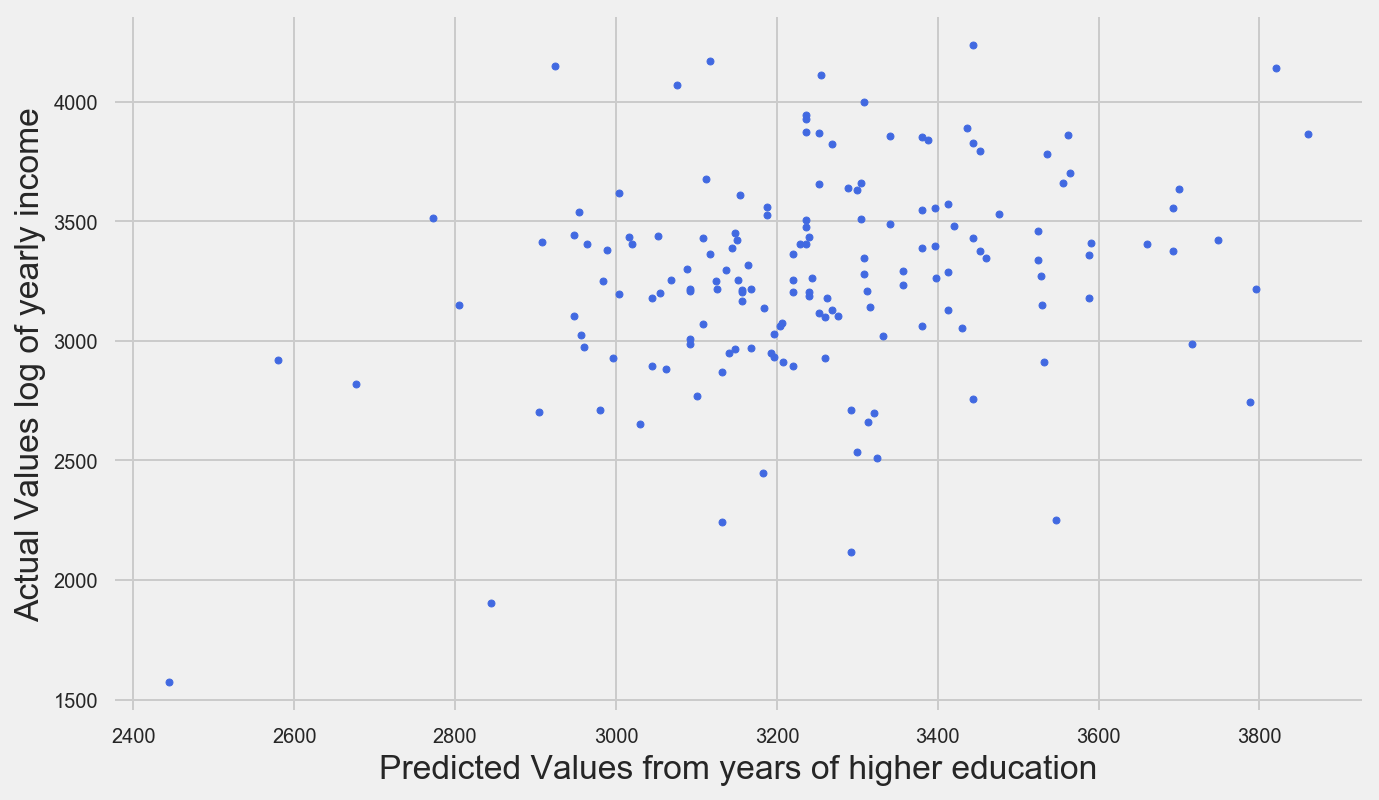

MSE: 175474.232


In [263]:
# From class notebook
predictions = lr.predict(Xtest)
predictions.shape

fig = plt.figure(figsize=(10,6))
plt.scatter(predictions, ytest, s=12, c='royalblue', marker='o')
plt.xlabel("Predicted Values from years of higher education")
plt.ylabel("Actual Values log of yearly income")
plt.show()

print ("MSE: %.3f" % (mean_squared_error(ytest, predictions)))


## 4.2.2 Regularization
    
---

### Implementing Ridge

In [264]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

ridge_alphas = np.logspace(0, 5, 200)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)

#cv= cross validate to run on 10 different random samples
optimal_ridge.fit(Xtrain, ytrain)
print (optimal_ridge.alpha_)

182.518349432


In [190]:
## Implement the Ridge Regression
ridge = Ridge(alpha=optimal_ridge.alpha_)

## Fit the Ridge regression
ridge.fit(Xtrain, ytrain)

ytrain_pred_ridge = ridge.predict(Xtrain)
ytest_pred_ridge = ridge.predict(Xtest)

print(ridge.coef_)
# print "=====\n"

[ 11.42488542 -12.7626048   16.50485873  13.215694    -3.53204694
 -12.82816338 -21.43619607   0.         -12.75993549   4.01309165
 -14.84438995  19.98312747   1.5063779  -12.06182327  23.95723015
  -0.37178756   6.65922276 -99.72836992  10.92861497  11.30992015
  13.0594885   -0.98576571]


In [191]:
## Cross validate = 10
ridge_scores = cross_val_score(ridge, Xtrain, ytrain, cv=10)
## Print the R^2
print ridge_scores
print "Average R^2 Ridge score: %.3f" % (np.mean(ridge_scores))
#it prints average score of all R-square found in different test samples

[ 0.07500074 -0.02618648 -0.01966599  0.17071025 -0.13420682  0.09634956
 -0.09254176  0.1103884   0.01640486  0.07799311]
Average R^2 Ridge score: 0.027


In [192]:
print('MSE - Ridge train: %.3f, test: %.3f' % (
        mean_squared_error(ytrain, ytrain_pred_ridge),
        mean_squared_error(ytest, ytest_pred_ridge)))
print('R^2 - Ridge train: %.3f, test: %.3f' % (
        r2_score(ytrain, ytrain_pred_ridge),
        r2_score(ytest, ytest_pred_ridge)))

MSE - Ridge train: 160997.399, test: 166610.128
R^2 - Ridge train: 0.144, test: 0.068


### Implementing Lasso

In [193]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xtrain, ytrain)
print (optimal_lasso.alpha_)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

27.9327687301


......................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s finished


In [194]:
# Cross-validate the Ridge $R^2$ with the optimal alpha.
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso_scores = cross_val_score(lasso, Xtrain, ytrain, cv=10)
print (lasso_scores)
print (np.mean(lasso_scores))

[ 0.10640148 -0.11982209 -0.01361774  0.22955379 -0.17518774  0.08657842
 -0.06403267  0.16584919  0.13142399  0.07804244]
0.0425189068464


In [195]:
## We implement the Lasso Regression
lasso = Lasso(alpha=optimal_lasso.alpha_)

## fit our regression
lasso.fit(Xtrain, ytrain)
ytrain_pred_lasso = lasso.predict(Xtrain)
ytest_pred_lasso = lasso.predict(Xtest)
print(lasso.coef_)
# print "====\n"


[   0.           -0.            0.            0.           -0.           -0.
   -3.6185002     0.           -0.           -0.           -0.
    4.57259235    0.           -0.           12.8469114     0.            0.
 -131.88846114    0.            0.72137754    0.            0.        ]


In [196]:
lasso_scores = cross_val_score(lasso, Xtrain, ytrain, cv=10)
print lasso_scores
print "Average R^2 Lasso score: %.3f" % (np.mean(lasso_scores))
print('MSE - Lasso train: %.3f, test: %.3f' % (
        mean_squared_error(ytrain, ytrain_pred_lasso),
        mean_squared_error(ytest, ytest_pred_lasso)))
print('R^2 - Lasso train: %.3f, test: %.3f' % (
        r2_score(ytrain, ytrain_pred_lasso),
        r2_score(ytest, ytest_pred_lasso)))

[ 0.10640148 -0.11982209 -0.01361774  0.22955379 -0.17518774  0.08657842
 -0.06403267  0.16584919  0.13142399  0.07804244]
Average R^2 Lasso score: 0.043
MSE - Lasso train: 164171.059, test: 166451.178
R^2 - Lasso train: 0.127, test: 0.069


### Implementing Elastic Net

In [197]:
#code from class notebook
l1_ratios = np.linspace(0.01, 1.0, 50)
optim_elnet = ElasticNetCV(l1_ratio= l1_ratios, n_alphas=300, cv=10, verbose=1)
optim_elnet.fit(Xtrain, ytrain)
print (optim_elnet.alpha_)
print (optim_elnet.l1_ratio_)


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

27.7433078738
1.0


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   39.0s finished


In [198]:
enet = ElasticNet(alpha=optim_elnet.alpha_, l1_ratio =optim_elnet.l1_ratio_)
enet_scores = cross_val_score(enet, Xtrain, ytrain, cv=10)
print (enet_scores)
print (np.mean(enet_scores))

[ 0.10614577 -0.11990735 -0.01343254  0.22983063 -0.17572508  0.08674184
 -0.0641196   0.16609668  0.13107155  0.07818414]
0.0424886020083


In [199]:
##  Create a model Enet
enet = ElasticNet(alpha=optim_elnet.alpha_, l1_ratio=optim_elnet.l1_ratio_)

## Fit your model
enet.fit(Xtrain, ytrain)

## predict
ytrain_pred_enet = enet.predict(Xtrain)
ytest_pred_enet = enet.predict(Xtest)

In [200]:
## we cross validate the scores and print MSE and R_sq
enet_scores = cross_val_score(enet, Xtrain, ytrain, cv=10)
print enet_scores
print "Average R^2 Elastic Net score: %.3f" % (np.mean(enet_scores))
print('MSE – Elastic Net train: %.3f, test: %.3f' % (
        mean_squared_error(ytrain, ytrain_pred_enet),
        mean_squared_error(ytest, ytest_pred_enet)))
print('R^2 - ElasticNet train: %.3f, test: %.3f' % (
        r2_score(ytrain, ytrain_pred_enet),
        r2_score(ytest, ytest_pred_enet)))

[ 0.10614577 -0.11990735 -0.01343254  0.22983063 -0.17572508  0.08674184
 -0.0641196   0.16609668  0.13107155  0.07818414]
Average R^2 Elastic Net score: 0.042
MSE – Elastic Net train: 164111.962, test: 166449.789
R^2 - ElasticNet train: 0.127, test: 0.069


## 4.2.3 What are the features that are the best predictors of mins sleep at night, per week
    What are the features with coefficients greater than 0
---

In [270]:
#from class

lm_stats = smf.ols(formula='sleep ~ age + yrsmarr', data=sleep).fit()
print (lm_stats.summary())

                            OLS Regression Results                            
Dep. Variable:                  sleep   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8121
Date:                Mon, 20 Mar 2017   Prob (F-statistic):              0.444
Time:                        21:30:32   Log-Likelihood:                -3980.7
No. Observations:                 532   AIC:                             7967.
Df Residuals:                     529   BIC:                             7980.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   3187.6747     69.265     46.021      0.0

## 4.2.4 Regression Tree 
    Gridsearch your tree
    Print the best parameters and best score from your gridsearch.
    Evaluate the performance of your tree
    Print the features that best explain your Y, are these features the same as the features you found before from the regularization methods or OLS
    
    OPTIONAL: Visualize the tree ONLY if your computer lets you do it. Your grade won't be penalized for not printing the tree, nor you will receive extra points for visualization the tree
---

In [201]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

## Here is the gridsearch
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

# ## Here crossvalidate 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

In [202]:
## Fit the regresion tree
dtr_gs.fit(Xtrain, ytrain)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 593 out of 600 | elapsed:    8.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    8.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [203]:
## Print Best Estimator, parameters and score
''' dtr_best = is the regression tree regressor with best parameters/estimators'''
dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

best estimator DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': None, 'min_samples_split': 2, 'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 10}


best score -0.0553492580467


In [173]:
# Print the features that best explain your Y
# from class notebook codes
''' Here I am defining a function to print feature importance using best models'''
def feature_imp(X, best_model):
    feature_imp = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_imp.sort_values('importance', ascending=False, inplace=True)
    return feature_imp

In [204]:
feature_imp(X, dtr_best)

,feature,importance
17,totwrk,0.680744
19,exper,0.136618
15,spsepay,0.119741
11,marr,0.062897
1,black,0.000000
20,yngkid,0.000000
18,union,0.000000
16,spwrk75,0.000000
14,south,0.000000
13,selfe,0.000000


In [225]:
## Predict 
y_pred_dtr= dtr_best.predict(Xtest)
y_pred_dtr

array([ 2651.41666667,  3582.9       ,  3251.67021277,  3191.11320755,
        3251.67021277,  3582.9       ,  3191.11320755,  3469.2244898 ,
        3191.11320755,  3191.11320755,  3191.11320755,  3251.67021277,
        3191.11320755,  2984.88461538,  3191.11320755,  3582.9       ,
        3191.11320755,  3191.11320755,  2984.88461538,  3191.11320755,
        3191.11320755,  3191.11320755,  3191.11320755,  3191.11320755,
        3582.9       ,  3251.67021277,  3191.11320755,  3251.67021277,
        3251.67021277,  3251.67021277,  3469.2244898 ,  2984.88461538,
        3251.67021277,  3191.11320755,  3469.2244898 ,  3191.11320755,
        3469.2244898 ,  3251.67021277,  3251.67021277,  3191.11320755,
        3251.67021277,  3251.67021277,  3191.11320755,  2984.88461538,
        3469.2244898 ,  3251.67021277,  3191.11320755,  3251.67021277,
        3191.11320755,  3191.11320755,  3191.11320755,  3469.2244898 ,
        2651.41666667,  3817.33333333,  3191.11320755,  3191.11320755,
      

In [226]:
# We use class notebook codes to define a function that print MSE and R^2
def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    """ first we need to predict on the test and train data"""
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
    """ We call the MSE in the following lines"""
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

In [227]:
#call the function
rsquare_meansquare_error(ytrain, ytest, Xtrain, Xtest, "Regression tree", dtr_best)

MSE Regression tree train data: 147460.72, test data: 194897.74
R^2 Regression tree train data: 0.22, test data: -0.09


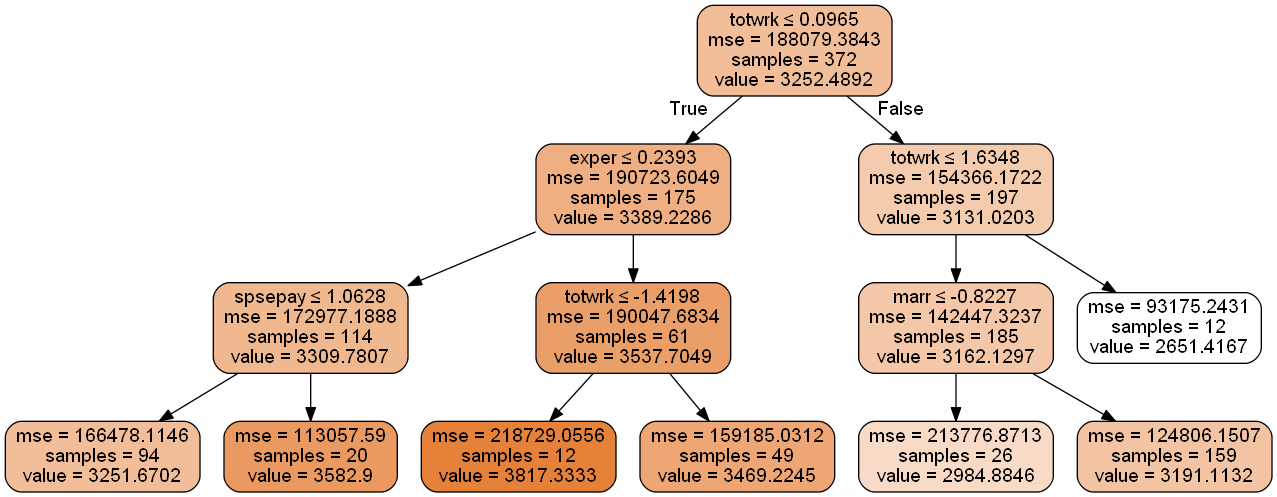

In [211]:

## Visualize your tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot
dot_data = StringIO()
''' dtr_best was previously defined'''

## Graph
export_graphviz(dtr_best, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## 4.2.3.1 Bonus
    Define a function that creates and prints the distribution of residuals on the train and test data from all the methods
---

In [ ]:
#From class notebook but i try to improve
#Function that calls the MSE and R^2 at once, using the name of the method and calling the best model

def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test1, best_model1, test2, best_model2, test3, best_model3, test4, best_model4):
    """ first we need to predict on the test and train data"""
    y_train_pred1 = best_model1.predict(train_X)
    y_test_pred1 = best_model1.predict(test_X)
    
    y_train_pred2 = best_model2.predict(train_X)
    y_test_pred2 = best_model2.predict(test_X)
    
    y_train_pred3 = best_model3.predict(train_X)
    y_test_pred3 = best_model3.predict(test_X)       
    
    y_train_pred4 = best_model4.predict(train_X)
    y_test_pred4 = best_model4.predict(test_X)

    """ We call the MSE in the following lines"""
    print ('MSE ' + test1 + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred1),
        mean_squared_error(test_y, y_test_pred1)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test1 + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred1),
        r2_score(test_y, y_test_pred1)))
    
    
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred2),
        mean_squared_error(test_y, y_test_pred2)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred2),
        r2_score(test_y, y_test_pred2)))
    
    
    print ('MSE ' + test3 + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred3),
        mean_squared_error(test_y, y_test_pred3)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test3 + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred3),
        r2_score(test_y, y_test_pred3)))
    
    
    print ('MSE ' + test4 + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred4),
        mean_squared_error(test_y, y_test_pred4)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test4 + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred4),
        r2_score(test_y, y_test_pred4)))

In [ ]:
#I call the function
rsquare_meansquare_error(train_y, test_y, train_X, test_X, test1, best_model1, test2, best_model2, test3, best_model3, test4, best_model4)

## 4.2.5 Random Forest Regression Tree
    Make sure you gridsearch your Random Forest
    Evaluate the performance
    Print the features that best explain mins sleep at night, per week 
---



In [217]:
#from class notebook
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

In [218]:
## Fit your random forest tree
estimator_rfr.fit(Xtrain, ytrain)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   29.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4], 'max_leaf_nodes': [5, 6, 7], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [219]:
## Print the best estimator, parameters and score from class notebook
''' rfr_best = is the random forest regression tree regressor with best parameters/estimators'''
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_


best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=6, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


best parameters {'min_samples_split': 4, 'max_leaf_nodes': 6, 'n_estimators': 100, 'max_depth': 3}


best score 0.0658617116542


In [220]:
feature_imp(X, rfr_best)

,feature,importance
17,totwrk,0.641254
9,lhrwage,0.055628
19,exper,0.051916
4,educ,0.040363
21,yrsmarr,0.029827
5,earns74,0.029189
1,black,0.025990
15,spsepay,0.023927
0,age,0.016638
10,male,0.013390


In [222]:
## Predict
y_pred_rfdtr= rfr_best.predict(Xtest)
y_pred_rfdtr

array([ 2743.93906252,  3444.29985054,  3359.83076654,  3159.0798744 ,
        3294.50845972,  3299.56034655,  3149.05101892,  3488.0552215 ,
        3144.54952074,  3222.04374279,  3170.26711013,  3373.85025739,
        3160.46834224,  3109.43948348,  3213.41525506,  3512.26692621,
        3134.52776534,  3147.57894807,  3204.03451836,  3162.09694867,
        3220.19095905,  3246.37108608,  3145.66478461,  3165.70509377,
        3439.25304171,  3474.72242093,  3148.72357015,  3342.20879726,
        3396.88102127,  3266.31321639,  3274.54633408,  3176.86597148,
        3267.19841612,  3176.79250102,  3478.6054536 ,  3085.33899116,
        3508.09390506,  3377.54058864,  3270.67847669,  3185.19819455,
        3280.59243045,  3270.93674892,  3194.3994447 ,  3120.18629804,
        3471.15205437,  3454.36281225,  3211.01861844,  3427.24620241,
        3152.90215764,  3142.19218665,  3230.10085415,  3305.43819673,
        2876.47902418,  3579.14097806,  3205.52684482,  3232.98271013,
      

In [224]:
## Evaluate your model from class notebook
rsquare_meansquare_error(ytrain, ytest, Xtrain, Xtest, "Random Forest Regression tree", rfr_best)

MSE Random Forest Regression tree train data: 140688.87, test data: 167855.87
R^2 Random Forest Regression tree train data: 0.25, test data: 0.06


## 5. Based on the MSE and R^2, in your opinion which model perform best and why?
---

In my opinion, random forest performed better because it has the lowest MSE than the rest of the models on the train data, but not on the test. Although it has the highest R_square on the train data (0.25) but low on the dataset (0.06), meaning the model is not performing well, it is still preferable than the rest.

## 6. Was there any trade off between bias and variance whem implementing the models?
    
---

ANS: Yest there was trade-off. On the linear regression, we have multicollinearity (too many variables), with a low bias, and a high variance (overfitting)
With Ridge, we only reduce coefficients on correlated features, so we still have all of them in the regression, leading to a low bias and a high variance.

Then, with Lasso (that removes some of the correlated variables), and Elastic Net( that uses both Ridge and lasso), we have now less features in the models, leading to a high bias, and a low variance.

With regression tree, we have the problem of low bias, high variance, because the algorith will use all the features altogether, and asks many questions searching in the data. When we specify the max depth, we arrange the problem.
With a max_depth of 1, the model suffers from high bias. With a max_depth of 10, the model suffers from high variance. 

With random forest on the other hand, the problem of overfitting is solved because it slices some features and observations randomly, evaluates, put the sample back and does the same process again. And at the end averages outputs of different samples. 

## 7. Explain the Bias Variance trade in the model you selected?
    
---

ANS:

As said before, With random forest on the other hand, the problem of overfitting is solved because it slices some features and observations randomly, evaluates, put the sample back and does the same process again (bagging).

So since the depth each time is not too high, we have more bias, and less variance.
